# Imports

In [174]:
import os
import pandas as pd
import seaborn as sns 
import matplotlib as plt
import numpy as np
import matplotlib as mpl
from matplotlib import pyplot as plt
from sklearn.model_selection import train_test_split
from sklearn.ensemble import GradientBoostingClassifier
from sklearn.model_selection import GridSearchCV
from sklearn.model_selection import validation_curve
from sklearn.decomposition import PCA
from sklearn.preprocessing import StandardScaler
from sklearn.tree import DecisionTreeClassifier
from sklearn.metrics import classification_report
from sklearn.metrics import roc_curve, auc
from sklearn.preprocessing import label_binarize
from itertools import cycle

# Preprocessing

### Importing CSV from Data Collection

In [175]:
df_import = pd.read_csv(os.path.join('data_collection', 'final_result.csv'))
df_import

,categories.id,categories.name,categories.playlists.id,categories.playlists.name,categories.playlists.tracks.id,categories.playlists.tracks.name,categories.playlists.tracks.album.id,categories.playlists.tracks.album.name,categories.playlists.tracks.artists,categories.playlists.tracks.features.danceability,...,categories.playlists.tracks.features.loudness,categories.playlists.tracks.features.mode,categories.playlists.tracks.features.speechiness,categories.playlists.tracks.features.acousticness,categories.playlists.tracks.features.instrumentalness,categories.playlists.tracks.features.liveness,categories.playlists.tracks.features.valence,categories.playlists.tracks.features.tempo,categories.playlists.tracks.features.duration_ms,categories.playlists.tracks.features.time_signature
0,hiphop,Hip-Hop,37i9dQZF1DX0XUsuxWHRQd,RapCaviar,2AaJeBEq3WLcfFW1y8svDf,By Your Side,2RrZgDND03MLu6pRJdTkz5,By Your Side,Rod Wave,0.649,...,-10.232,1,0.0959,0.03450,0.000036,0.0736,0.405,157.975,194051,4
1,hiphop,Hip-Hop,37i9dQZF1DX0XUsuxWHRQd,RapCaviar,7uLFOXgLrS90tEYPO1DGXy,Man in the Mirror,1VxVQAgekwkFo8yoXvFZ8o,B4 AVA,A Boogie Wit da Hoodie,0.849,...,-4.241,0,0.0637,0.17100,0.000000,0.1490,0.550,135.997,215304,4
2,hiphop,Hip-Hop,37i9dQZF1DX0XUsuxWHRQd,RapCaviar,2lUDBd7JrgAMltcp6dcd7D,25 million,1eVrpJbHRLBbioB9sb5b94,LIVE LIFE FAST,Roddy Ricch,0.793,...,-9.258,1,0.1240,0.01900,0.000001,0.1390,0.395,132.202,204626,4
3,hiphop,Hip-Hop,37i9dQZF1DX0XUsuxWHRQd,RapCaviar,0qHPxjC83zQYcxe39xSShx,thailand,1eVrpJbHRLBbioB9sb5b94,LIVE LIFE FAST,Roddy Ricch,0.875,...,-10.562,1,0.2180,0.00717,0.000000,0.1470,0.409,128.990,200959,4
4,hiphop,Hip-Hop,37i9dQZF1DX0XUsuxWHRQd,RapCaviar,2QIBJFl8DJR1mDh9GwfZef,Don’t Play (with Lil Baby),2rLqUcipEjIKK9rma5OTN8,Hall of Fame 2.0,"Polo G,Lil Baby",0.684,...,-7.414,0,0.3470,0.23900,0.000000,0.1120,0.708,146.925,156735,4
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
158317,funk,Funk & Disco,37i9dQZF1DX0oFpWfPwcGv,Disco Decadence,00Zum0eGUHgcE5l8MoNuUG,"Turn the Beat Around - 7"" Single Edit",7vlYGZ9hnsuC57PUiqy0WC,Never Gonna Let You Go (Expanded Edition),Vicki Sue Robinson,0.707,...,-7.540,0,0.0720,0.44500,0.000000,0.3660,0.822,131.242,204653,4
158318,funk,Funk & Disco,37i9dQZF1DX0oFpWfPwcGv,Disco Decadence,2vLaES21zwbX1Rnmj56Bbb,I'll Be Around,6QVemXFGMR4OLvlXvtQVjg,Spinners,The Spinners,0.593,...,-8.698,0,0.0680,0.17500,0.000000,0.0976,0.630,112.295,188800,4
158319,funk,Funk & Disco,37i9dQZF1DX0oFpWfPwcGv,Disco Decadence,3eudp9ZxZAGaDBOuWGrW2D,Got to Be Real - Single Version,059jmsqbxhu2n78LMS0H3P,Cheryl Lynn (Expanded Edition),Cheryl Lynn,0.830,...,-7.462,1,0.0448,0.20200,0.044800,0.1370,0.901,114.646,223173,4
158320,funk,Funk & Disco,37i9dQZF1DX0oFpWfPwcGv,Disco Decadence,3YJx77Xx8JSwEoxqrkQO5c,Knock on Wood,07ojYfe9B08p7nmOL2kgNF,Knock On Wood,Eddie Floyd,0.864,...,-12.918,1,0.0365,0.27700,0.005210,0.0514,0.964,105.164,189840,4


In [176]:
df_import.dtypes

categories.id                                             object
categories.name                                           object
categories.playlists.id                                   object
categories.playlists.name                                 object
categories.playlists.tracks.id                            object
categories.playlists.tracks.name                          object
categories.playlists.tracks.album.id                      object
categories.playlists.tracks.album.name                    object
categories.playlists.tracks.artists                       object
categories.playlists.tracks.features.danceability        float64
categories.playlists.tracks.features.energy              float64
categories.playlists.tracks.features.key                   int64
categories.playlists.tracks.features.loudness            float64
categories.playlists.tracks.features.mode                  int64
categories.playlists.tracks.features.speechiness         float64
categories.playlists.trac

### Removing duplicates
Duplicates are removed by artist and track names.
This ensures that tracks that were released twice (e.g. single before album) are still deduplicated.
Using the track id as a deduplication criterion wouldn't achieve this.

In [177]:
df_dedup = df_import.drop_duplicates(subset=['categories.playlists.tracks.artists', 'categories.playlists.tracks.name'])

### List all genre names

In [178]:
genres = df_dedup['categories.name'].unique()
print(genres)

['Hip-Hop' 'Pop' 'Country' 'Rock' 'Latin' 'R&B' 'Mood' 'Indie'
 'Regional Mexican' 'Dance/Electronic' 'Christian & Gospel' 'Chill'
 'Party' 'Folk & Acoustic' 'K-Pop' 'Instrumental' 'Ambient' 'Alternative'
 'Classical' 'Jazz' 'Soul' 'Punk' 'Blues' 'Arab' 'Metal' 'Caribbean'
 'Funk & Disco']


### Filter genres

In [179]:
genre_filter = ['hiphop', 'jazz', 'rock']
df_filtered = df_dedup[df_dedup['categories.id'].isin(genre_filter)]

### Drop unneeded columns and rename

In [180]:
columns_to_drop = [
    "categories.name",
    "categories.playlists.id",
    "categories.playlists.name",
    "categories.playlists.tracks.id",
    "categories.playlists.tracks.name",
    "categories.playlists.tracks.album.id",
    "categories.playlists.tracks.album.name",
    "categories.playlists.tracks.artists"
    ]
df_dropped = df_filtered.drop(columns=columns_to_drop)

df_dropped = df_dropped.rename(columns={
    "categories.id": "category",
    "categories.playlists.tracks.features.danceability": "feature_danceability",
    "categories.playlists.tracks.features.energy": "feature_energy",
    "categories.playlists.tracks.features.key": "feature_key",
    "categories.playlists.tracks.features.loudness": "feature_loudness",
    "categories.playlists.tracks.features.mode": "feature_mode",
    "categories.playlists.tracks.features.speechiness": "feature_speechiness",
    "categories.playlists.tracks.features.acousticness": "feature_acousticness",
    "categories.playlists.tracks.features.instrumentalness": "feature_instrumentalness",
    "categories.playlists.tracks.features.liveness": "feature_liveness",
    "categories.playlists.tracks.features.valence": "feature_valence",
    "categories.playlists.tracks.features.tempo": "feature_tempo",
    "categories.playlists.tracks.features.duration_ms": "feature_duration_ms",
    "categories.playlists.tracks.features.time_signature": "feature_time_signature"
})
df_dropped = df_dropped.reset_index(drop=True)
df_dropped

,category,feature_danceability,feature_energy,feature_key,feature_loudness,feature_mode,feature_speechiness,feature_acousticness,feature_instrumentalness,feature_liveness,feature_valence,feature_tempo,feature_duration_ms,feature_time_signature
0,hiphop,0.649,0.5080,8,-10.232,1,0.0959,0.03450,0.000036,0.0736,0.4050,157.975,194051,4
1,hiphop,0.849,0.6310,3,-4.241,0,0.0637,0.17100,0.000000,0.1490,0.5500,135.997,215304,4
2,hiphop,0.793,0.4810,9,-9.258,1,0.1240,0.01900,0.000001,0.1390,0.3950,132.202,204626,4
3,hiphop,0.875,0.4780,7,-10.562,1,0.2180,0.00717,0.000000,0.1470,0.4090,128.990,200959,4
4,hiphop,0.684,0.6240,2,-7.414,0,0.3470,0.23900,0.000000,0.1120,0.7080,146.925,156735,4
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
13372,jazz,0.421,0.0952,6,-12.561,1,0.0479,0.93100,0.000201,0.1260,0.0773,109.698,177922,4
13373,jazz,0.503,0.4910,0,-12.020,1,0.0295,0.04120,0.922000,0.0965,0.4890,166.105,263447,4
13374,jazz,0.644,0.5940,5,-9.965,1,0.1170,0.75100,0.224000,0.1070,0.6320,90.564,494467,4
13375,jazz,0.462,0.2110,0,-13.396,1,0.0586,0.66500,0.946000,0.1140,0.4260,179.658,77190,3


### See, if data contains any null or NA values

In [181]:
df_dropped.isnull().sum()

category                    0
feature_danceability        0
feature_energy              0
feature_key                 0
feature_loudness            0
feature_mode                0
feature_speechiness         0
feature_acousticness        0
feature_instrumentalness    0
feature_liveness            0
feature_valence             0
feature_tempo               0
feature_duration_ms         0
feature_time_signature      0
dtype: int64

# Data Understanding

## Basic Understanding

Show table head

In [182]:
df_und = df_dropped
df_und.head()

,category,feature_danceability,feature_energy,feature_key,feature_loudness,feature_mode,feature_speechiness,feature_acousticness,feature_instrumentalness,feature_liveness,feature_valence,feature_tempo,feature_duration_ms,feature_time_signature
0,hiphop,0.649,0.508,8,-10.232,1,0.0959,0.03450,0.000036,0.0736,0.405,157.975,194051,4
1,hiphop,0.849,0.631,3,-4.241,0,0.0637,0.17100,0.000000,0.1490,0.550,135.997,215304,4
2,hiphop,0.793,0.481,9,-9.258,1,0.1240,0.01900,0.000001,0.1390,0.395,132.202,204626,4
3,hiphop,0.875,0.478,7,-10.562,1,0.2180,0.00717,0.000000,0.1470,0.409,128.990,200959,4
4,hiphop,0.684,0.624,2,-7.414,0,0.3470,0.23900,0.000000,0.1120,0.708,146.925,156735,4


Show shape of data and samples per category

In [183]:
# shape (rows, columns)
print('basic shape:  ', df_und.shape)

# amount of each category 
print('amount of samples for ...')
print('hiphop:  ', df_und.loc[df_und['category'] == 'hiphop'].shape[0])
print('rock:   ' , df_und.loc[df_und['category'] == 'rock'].shape[0])
print('jazz:    ', df_und.loc[df_und['category'] == 'jazz'].shape[0])

basic shape:   (13377, 14)
amount of samples for ...
hiphop:   2694
rock:    7252
jazz:     3431


## Analysis of a single feature
Change the following variable feature to select which features should be analysed in this section.

In [184]:
feature = 'feature_energy'

### Basic feature information

In [185]:
# overall basic feature information
print('overall:')
print(df_und[feature].describe())
#skewness and kurtosis

# skewness and kurtosis
print('\nskewness: %f' % df_und[feature].skew())
print('kurtosis: %f'   % df_und[feature].kurt())

overall:
count    13377.000000
mean         0.650739
std          0.235224
min          0.001530
25%          0.505000
50%          0.687000
75%          0.845000
max          0.999000
Name: feature_energy, dtype: float64

skewness: -0.689911
kurtosis: -0.254297


### Category specific feature information

In [186]:
df_hiphop   = df_und.loc[df['category'] == 'hiphop']
df_rock     = df_und.loc[df['category'] == 'rock']
df_jazz     = df_und.loc[df['category'] == 'jazz']

Hip-Hop

In [187]:
print('hiphop:')
print(df_hiphop[feature].describe())

# skewness and kurtosis
print('\nskewness: %f' % df_hiphop[feature].skew())
print('kurtosis: %f'   % df_hiphop[feature].kurt())

hiphop:
count    2694.000000
mean        0.641614
std         0.149233
min         0.097600
25%         0.536000
50%         0.641000
75%         0.750000
max         0.995000
Name: feature_energy, dtype: float64

skewness: -0.118530
kurtosis: -0.365503


Jazz

In [188]:
print('jazz:')
print(df_jazz[feature].describe())

# skewness and kurtosis
print('\nskewness: %f' % df_jazz[feature].skew())
print('kurtosis: %f'   % df_jazz[feature].kurt())

jazz:
count    3431.000000
mean        0.441448
std         0.248839
min         0.001530
25%         0.231500
50%         0.436000
75%         0.638000
max         0.992000
Name: feature_energy, dtype: float64

skewness: 0.126479
kurtosis: -1.005078


Rock

In [189]:
print('rock:')
print(df_rock[feature].describe())

# skewness and kurtosis
print('\nskewness: %f' % df_rock[feature].skew())
print('kurtosis: %f'   % df_rock[feature].kurt())

rock:
count    7252.000000
mean        0.753147
std         0.182375
min         0.045700
25%         0.645000
50%         0.798500
75%         0.901000
max         0.999000
Name: feature_energy, dtype: float64

skewness: -0.935620
kurtosis: 0.327018


### Graphical analysis of the selected feature

Distribution Plot

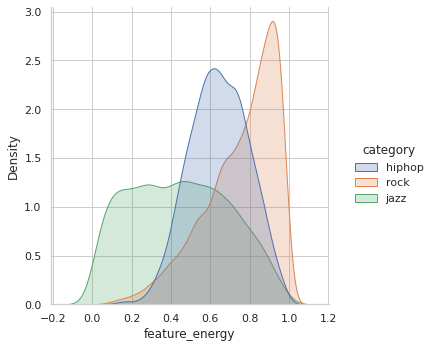

In [190]:
sns.set(style="whitegrid")
ax = sns.displot(data = df_und, x = feature, hue = df_und['category'], kind="kde",fill=True,common_norm=False)

Boxplot

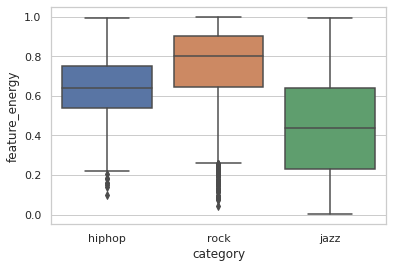

In [191]:
ax = sns.boxplot(data = df_und, x = 'category', y = feature)

## Correlation between all features

Overall Correlation

<AxesSubplot:>

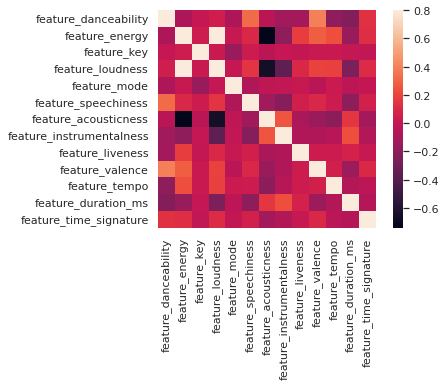

In [192]:
corrmat = df_und.corr()
sns.heatmap(corrmat, vmax=.8, square=True)

Correlations of Hip-Hop samples

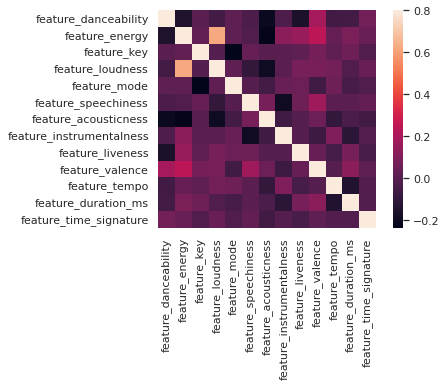

In [193]:
corrmat = df_hiphop.corr()
sns.heatmap(corrmat, vmax=.8, square=True);

Correlations of Jazz samples

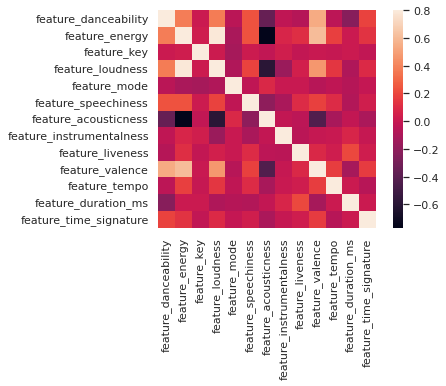

In [194]:
corrmat = df_jazz.corr()
sns.heatmap(corrmat, vmax=.8, square=True);

Correlations of Rock samples

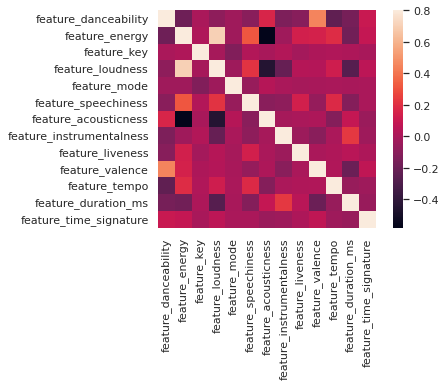

In [195]:
corrmat = df_rock.corr()
sns.heatmap(corrmat, vmax=.8, square=True);

## Correlation between two features

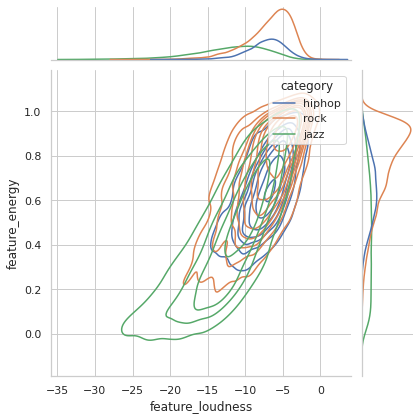

In [196]:
feature_x = 'feature_loudness'
feature_y = 'feature_energy'

sns.jointplot(
    data = df_und,
    x    = feature_x,
    y    = feature_y,
    hue  = "category",
    kind = "kde")

# Data Preparation for Modeling

### Map categories to integers

In [197]:
def encode_target(df, target_column):

    df_mod = df.copy()
    map_to_int = {name: n for n, name in enumerate(df_mod["category"].unique())}
    df_mod.insert(1, "target", df_mod[target_column].replace(map_to_int))

    return df_mod

df = encode_target(df_dropped, "category")
df

,category,target,feature_danceability,feature_energy,feature_key,feature_loudness,feature_mode,feature_speechiness,feature_acousticness,feature_instrumentalness,feature_liveness,feature_valence,feature_tempo,feature_duration_ms,feature_time_signature
0,hiphop,0,0.649,0.5080,8,-10.232,1,0.0959,0.03450,0.000036,0.0736,0.4050,157.975,194051,4
1,hiphop,0,0.849,0.6310,3,-4.241,0,0.0637,0.17100,0.000000,0.1490,0.5500,135.997,215304,4
2,hiphop,0,0.793,0.4810,9,-9.258,1,0.1240,0.01900,0.000001,0.1390,0.3950,132.202,204626,4
3,hiphop,0,0.875,0.4780,7,-10.562,1,0.2180,0.00717,0.000000,0.1470,0.4090,128.990,200959,4
4,hiphop,0,0.684,0.6240,2,-7.414,0,0.3470,0.23900,0.000000,0.1120,0.7080,146.925,156735,4
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
13372,jazz,2,0.421,0.0952,6,-12.561,1,0.0479,0.93100,0.000201,0.1260,0.0773,109.698,177922,4
13373,jazz,2,0.503,0.4910,0,-12.020,1,0.0295,0.04120,0.922000,0.0965,0.4890,166.105,263447,4
13374,jazz,2,0.644,0.5940,5,-9.965,1,0.1170,0.75100,0.224000,0.1070,0.6320,90.564,494467,4
13375,jazz,2,0.462,0.2110,0,-13.396,1,0.0586,0.66500,0.946000,0.1140,0.4260,179.658,77190,3


### Show final integer mapping

In [198]:
df[["target", "category"]].drop_duplicates(subset=['target', 'category'])

,target,category
0,0,hiphop
2694,1,rock
9946,2,jazz


## Data Transformation and Dimension Reduction
Overview over all scores is given at the end of this section

Function for shuffling, splitting, fitting and scoring a simple model

In [199]:
def eval_prep(df, feature_column_names, label_column_name):
    train, test = train_test_split(df, test_size=0.2, random_state=45, shuffle=True)

    X_train = train[feature_column_names]
    X_test = test[feature_column_names]

    y_train = train[label_column_name]
    y_test = test[label_column_name]

    # Create gradient boosting classifier object with default values
    gbc = GradientBoostingClassifier(random_state=45)

    gbc.fit(X_train, y_train)
    score = gbc.score(X_test, y_test)
    
    return score

score_overview = []

### Simple regular Gradient Boosting Model for reference

In [200]:
features = list(df.columns[2:])

score = eval_prep(df, features, "target")
score_overview.append({"score": score, "desc": "Regular Gradient Boosting"})

### Mean Removal

In [201]:
X_mr = df[features]
y = df["target"]

X_mr = StandardScaler(with_std=False).fit_transform(X_mr)

df_mr = pd.DataFrame(data=X_mr)
df_mr.insert(0, "target", y)
df_mr.columns = ["target"] + features

score = eval_prep(df_mr, features, "target")

score_overview.append({"score": score, "desc": "Mean Removal"})

### Variance Scaling

In [202]:
X_vs = df[features]
y = df["target"]

X_vs = StandardScaler(with_mean=False).fit_transform(X_vs)

df_vs = pd.DataFrame(data=X_vs)
df_vs.insert(0, "target", y)
df_vs.columns = ["target"] + features

score = eval_prep(df_vs, features, "target")

score_overview.append({"score": score, "desc": "Variance Scaling"})

### Standardization

In [203]:
X_s = df[features]
y = df["target"]

X_s = StandardScaler().fit_transform(X_s)

df_s = pd.DataFrame(data=X_s)
df_s.insert(0, "target", y)
df_s.columns = ["target"] + features

score = eval_prep(df_s, features, "target")

score_overview.append({"score": score, "desc": "Standardization"})

### PCA

In [204]:
scores = []

for n_components in range(2,14):

    X_pca = df[features]
    y = df["target"]

    # column names
    column_names = ["target"]
    for n in range(n_components):
        column_names.append(f"pc{n}")

    pca = PCA(n_components=n_components)

    X_pca = pca.fit_transform(X_pca)

    df_pca = pd.DataFrame(data=X_pca)

    df_pca.insert(0, "target", y)
    df_pca.columns = column_names

    score = eval_prep(df_pca, column_names[1:], "target")

    scores.append({"components": n_components, "score": score})

highscore = 0
optimal_components = 0
for entry in scores:
    if entry["score"] > highscore:
        highscore = entry["score"]
        optimal_components = entry["components"]
    
print(f"PCA with {optimal_components} components yielded optimal score: {highscore}")

score_overview.append({"score": highscore, "desc": "Regular PCA"})

PCA with 13 components yielded optimal score: 0.8352017937219731


Plotting score for each dimensionality

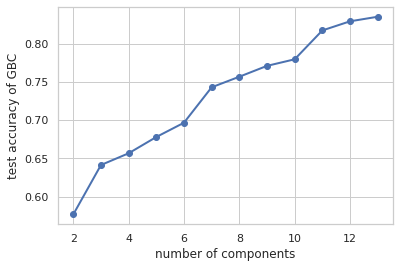

In [205]:
fig, ax = plt.subplots()

plt_scores = []
plt_comps = []
for e in scores:
    plt_scores.append(e['score'])
    plt_comps.append(e['components'])
ax.plot(plt_comps, plt_scores, linewidth=2.0, marker='o')
ax.set_xlabel('number of components')
ax.set_ylabel('test accuracy of GBC')
ax.grid(True)

### Standardization after PCA

In [206]:
scores = []

for n_components in range(2,14):

    X_pca_s = df[features]
    y = df["target"]

    # column names
    column_names = ["target"]
    for n in range(n_components):
        column_names.append(f"pc{n}")

    pca = PCA(n_components=n_components)

    X_pca_s = pca.fit_transform(X_pca_s)
    X_pca_s = StandardScaler().fit_transform(X_pca_s)

    df_pca_s = pd.DataFrame(data=X_pca_s)

    df_pca_s.insert(0, "target", y)
    df_pca_s.columns = column_names

    score = eval_prep(df_pca_s, column_names[1:], "target")

    scores.append({"components": n_components, "score": score})

highscore = 0
optimal_components = 0
for entry in scores:
    if entry["score"] > highscore:
        highscore = entry["score"]
        optimal_components = entry["components"]
    
print(f"PCA with {optimal_components} components yielded optimal score: {highscore}")

score_overview.append({"score": highscore, "desc": "Standardization after PCA"})

PCA with 13 components yielded optimal score: 0.8348281016442451


### Standardization before PCA

In [207]:
scores = []

for n_components in range(2,14):

    X_pca_s = df[features]
    y = df["target"]

    # column names
    column_names = ["target"]
    for n in range(n_components):
        column_names.append(f"pc{n}")

    pca = PCA(n_components=n_components)

    X_pca_s = StandardScaler().fit_transform(X_pca_s)
    X_pca_s = pca.fit_transform(X_pca_s)

    df_pca_s = pd.DataFrame(data=X_pca_s)
    df_pca_s.insert(0, "target", y)
    df_pca_s.columns = column_names

    score = eval_prep(df_pca_s, column_names[1:], "target")

    scores.append({"components": n_components, "score": score})

highscore = 0
optimal_components = 0
for entry in scores:
    if entry["score"] > highscore:
        highscore = entry["score"]
        optimal_components = entry["components"]

print(f"PCA with {optimal_components} components yielded optimal score: {highscore}")

score_overview.append({"score": highscore, "desc": "Standardization before PCA"})

PCA with 13 components yielded optimal score: 0.827727952167414


### Score Overview

In [208]:
print("Score overview:")
highscore = 0
best_desc = ""
for entry in score_overview:
    if entry['score'] > highscore:
        highscore = entry['score']
        best_desc = entry['desc']
    print(f"{entry['desc']}: {entry['score']}")

print("\nMethod with highest score: " + best_desc)


Score overview:
Regular Gradient Boosting: 0.8505231689088192
Mean Removal: 0.850896860986547
Variance Scaling: 0.852017937219731
Standardization: 0.8523916292974589
Regular PCA: 0.8352017937219731
Standardization after PCA: 0.8348281016442451
Standardization before PCA: 0.827727952167414

Method with highest score: Standardization


The best score was achieved using the standardized dataset (df_s), so this will be used in the modeling stage.

# Modeling

### Basic examination of the standardized dataset

In [209]:
df_s

,target,feature_danceability,feature_energy,feature_key,feature_loudness,feature_mode,feature_speechiness,feature_acousticness,feature_instrumentalness,feature_liveness,feature_valence,feature_tempo,feature_duration_ms,feature_time_signature
0,0,0.525952,-0.606845,0.791667,-0.469262,0.790819,-0.001432,-0.677224,-0.560184,-0.743415,-0.387093,1.175112,-0.468065,0.189922
1,0,1.699036,-0.083920,-0.611631,0.952395,-1.264512,-0.317468,-0.240457,-0.560299,-0.296830,0.235137,0.449933,-0.270797,0.189922
2,0,1.370572,-0.721633,1.072326,-0.238133,0.790819,0.274363,-0.726820,-0.560296,-0.356059,-0.430006,0.324715,-0.369909,0.189922
3,0,1.851536,-0.734387,0.511007,-0.547571,0.790819,1.196953,-0.764673,-0.560299,-0.308675,-0.369929,0.218733,-0.403946,0.189922
4,0,0.731242,-0.113680,-0.892290,0.199446,-1.264512,2.463060,-0.022873,-0.560299,-0.515977,0.913153,0.810510,-0.814428,0.189922
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
13372,2,-0.811363,-2.361830,0.230348,-1.021931,0.790819,-0.472542,2.191359,-0.559652,-0.433056,-1.793333,-0.417819,-0.617773,0.189922
13373,2,-0.330399,-0.679119,-1.453609,-0.893553,0.790819,-0.653134,-0.655785,2.407617,-0.607781,-0.026629,1.443366,0.176060,0.189922
13374,2,0.496625,-0.241223,-0.050312,-0.405903,0.790819,0.205660,1.615403,0.160756,-0.545591,0.587018,-1.049158,2.320361,0.189922
13375,2,-0.570881,-1.869516,-1.453609,-1.220076,0.790819,-0.367524,1.340224,2.484873,-0.504131,-0.296977,1.890556,-1.552755,-2.667886


In [210]:
df_s.describe()

,target,feature_danceability,feature_energy,feature_key,feature_loudness,feature_mode,feature_speechiness,feature_acousticness,feature_instrumentalness,feature_liveness,feature_valence,feature_tempo,feature_duration_ms,feature_time_signature
count,13377.000000,1.337700e+04,1.337700e+04,1.337700e+04,1.337700e+04,1.337700e+04,1.337700e+04,13377.000000,1.337700e+04,1.337700e+04,1.337700e+04,1.337700e+04,1.337700e+04,1.337700e+04
mean,1.055095,-5.269181e-16,6.119049e-16,-1.699736e-17,-1.359789e-16,-2.124670e-18,-1.359789e-16,0.000000,6.798944e-17,-6.374010e-18,-3.399472e-17,-1.784723e-16,1.189815e-16,-1.019842e-16
std,0.674444,1.000037e+00,1.000037e+00,1.000037e+00,1.000037e+00,1.000037e+00,1.000037e+00,1.000037,1.000037e+00,1.000037e+00,1.000037e+00,1.000037e+00,1.000037e+00,1.000037e+00
min,0.000000,-2.805019e+00,-2.760061e+00,-1.453609e+00,-5.649022e+00,-1.264512e+00,-7.228188e-01,-0.787612,-5.602992e-01,-1.098789e+00,-2.015620e+00,-2.826733e+00,-2.052770e+00,-8.383503e+00
25%,1.000000,-7.116513e-01,-6.195990e-01,-8.922902e-01,-4.571599e-01,-1.264512e+00,-5.844304e-01,-0.765761,-5.602992e-01,-6.012662e-01,-7.904702e-01,-8.080589e-01,-5.583408e-01,1.899224e-01
50%,1.000000,-4.885906e-02,1.541591e-01,-5.031183e-02,2.248371e-01,7.908191e-01,-4.391716e-01,-0.526515,-5.588410e-01,-4.152875e-01,-1.804667e-02,-7.793114e-02,-1.942868e-01,1.899224e-01
75%,2.000000,7.077799e-01,8.258832e-01,7.916665e-01,7.034689e-01,7.908191e-01,4.862320e-02,0.527485,-2.272643e-02,3.132278e-01,7.758331e-01,7.131066e-01,2.929470e-01,1.899224e-01
max,2.000000,2.473271e+00,1.480602e+00,1.633645e+00,2.443819e+00,7.908191e-01,7.910265e+00,2.399344,2.623290e+00,4.725779e+00,2.101827e+00,3.226484e+00,2.161469e+01,3.047731e+00


## Decision Tree Classifier for Comparison

### Preparation

Splitting and shuffling the dataset

In [211]:
train, test = train_test_split(df_s, test_size=0.2, random_state=45, shuffle=True)

Seperating labels and features

In [212]:
X_train = train[features]
X_test = test[features]

y_train = train["target"]
y_test = test["target"]

### Hyperparameter Tuning

In [213]:
dt = DecisionTreeClassifier(random_state=45)

param_grid = {
    "criterion": ["gini", "entropy"],
    "splitter": ["best", "random"],
    "max_depth": [30, 50, 75, None],
    "min_samples_split": [2, 5, 10, 15, 20],
    "min_samples_leaf": [1, 3, 5, 10],
    "min_samples_leaf": [1],
    "max_features": ["auto", "sqrt", "log2"],
    "random_state": [42],
    "max_features": [None]
}

# Grid search object
search_dt = GridSearchCV(dt, param_grid, n_jobs=-1, cv=5)

# Fitting model
search_dt.fit(X_train, y_train)

score_dt = search_dt.score(X_test, y_test)


## Validation Curves

### Function to create validation curves
This takes the hyperparameter that should be modulated and
a range to use for plotting.

In [214]:
def val_curve(param_name, param_range):

    X = df_s[features]
    y = df_s["target"]

    gbc = GradientBoostingClassifier(random_state=45)
    train_scores, test_scores = validation_curve(gbc, X, y,
        param_name=param_name,
        param_range=param_range,
        n_jobs=-1)

    train_scores_mean = np.mean(train_scores, axis=1)
    train_scores_std = np.std(train_scores, axis=1)
    test_scores_mean = np.mean(test_scores, axis=1)
    test_scores_std = np.std(test_scores, axis=1)

    #plt.title("Validation Curve with Gradient Boosting Classifier")
    plt.xlabel("learning_rate")
    plt.ylabel("accuracy")
    #plt.ylim(0.0, 1.1)
    lw = 2
    plt.plot(
        param_range, train_scores_mean, label="Training score", color="darkorange", lw=lw
    )
    plt.fill_between(
        param_range,
        train_scores_mean - train_scores_std,
        train_scores_mean + train_scores_std,
        alpha=0.2,
        color="darkorange",
        lw=lw,
    )
    plt.plot(
        param_range, test_scores_mean, label="Cross-validation score", color="navy", lw=lw
    )
    plt.fill_between(
        param_range,
        test_scores_mean - test_scores_std,
        test_scores_mean + test_scores_std,
        alpha=0.2,
        color="navy",
        lw=lw,
    )
    plt.legend(loc="best")
    plt.figure(dpi=200)
    plt.show()

### Validation curve learning_rate

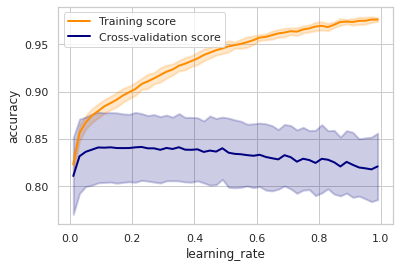

<Figure size 1200x800 with 0 Axes>

In [215]:
val_curve("learning_rate", np.linspace(0.01,0.99,50))

### Validation curve n_estimators

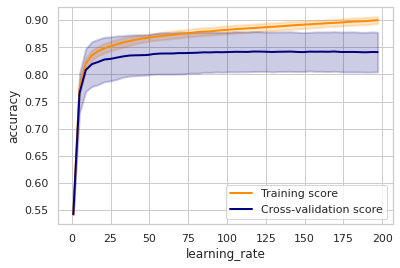

<Figure size 1200x800 with 0 Axes>

In [216]:
val_curve("n_estimators", range(1,199,4))

### Validation curve max_depth

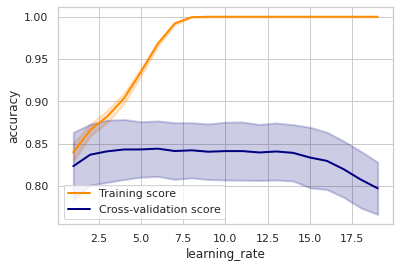

<Figure size 1200x800 with 0 Axes>

In [217]:
val_curve("max_depth", range(1,20,1))

## Gradient Boosting Classifier

### Preparation

Splitting and shuffling the dataset

In [218]:
train, test = train_test_split(df_s, test_size=0.2, random_state=45, shuffle=True)

Seperating labels and features

In [219]:
X_train = train[features]
X_test = test[features]

y_train = train["target"]
y_test = test["target"]

### Hyperparameter Tuning

Specifying parameter ranges for hyperparameter tuning

In [220]:
learning_rate_values = np.linspace(0.01,0.25,9).round(2)
n_estimators_values = np.linspace(50,200,7).astype(int)
max_depth_values = np.linspace(2,6,5).astype(int)

param_grid = {
    "n_estimators": n_estimators_values,
    "learning_rate": learning_rate_values,
    "max_depth": max_depth_values
}

print("Values for learning_rate in grid search:")
print(learning_rate_values)
print("Values for n_estimators in grid search:")
print(n_estimators_values)
print("Values for max_depth in grid search:")
print(max_depth_values)

Values for learning_rate in grid search:
[0.01 0.04 0.07 0.1  0.13 0.16 0.19 0.22 0.25]
Values for n_estimators in grid search:
[ 50  75 100 125 150 175 200]
Values for max_depth in grid search:
[2 3 4 5 6]


Creating the Classifier and Grid Search objects

In [221]:
gbc = GradientBoostingClassifier(random_state=45)

search = GridSearchCV(gbc, param_grid,
    n_jobs=-1,
    error_score="raise",
    verbose=1)

Fitting the first Grid Search model on the training data and calculating an accuracy score using the test set

In [222]:
search.fit(X_train, y_train)

print("Accuracy score:")
print(search.score(X_test, y_test))

Fitting 5 folds for each of 315 candidates, totalling 1575 fits
Accuracy score:
0.859118086696562


Parameters found through Grid Search

In [223]:
search.get_params()

{'cv': None,
 'error_score': 'raise',
 'estimator__ccp_alpha': 0.0,
 'estimator__criterion': 'friedman_mse',
 'estimator__init': None,
 'estimator__learning_rate': 0.1,
 'estimator__loss': 'deviance',
 'estimator__max_depth': 3,
 'estimator__max_features': None,
 'estimator__max_leaf_nodes': None,
 'estimator__min_impurity_decrease': 0.0,
 'estimator__min_samples_leaf': 1,
 'estimator__min_samples_split': 2,
 'estimator__min_weight_fraction_leaf': 0.0,
 'estimator__n_estimators': 100,
 'estimator__n_iter_no_change': None,
 'estimator__random_state': 45,
 'estimator__subsample': 1.0,
 'estimator__tol': 0.0001,
 'estimator__validation_fraction': 0.1,
 'estimator__verbose': 0,
 'estimator__warm_start': False,
 'estimator': GradientBoostingClassifier(random_state=45),
 'n_jobs': -1,
 'param_grid': {'n_estimators': array([ 50,  75, 100, 125, 150, 175, 200]),
  'learning_rate': array([0.01, 0.04, 0.07, 0.1 , 0.13, 0.16, 0.19, 0.22, 0.25]),
  'max_depth': array([2, 3, 4, 5, 6])},
 'pre_dispat

Fitting the second Grid Search Model
This model uses a tighter range for the n_estimators parameter to try and further optimize the results

In [236]:
param_grid_2 = {
    "n_estimators": [97,98,99,100,101,102,103],
    "learning_rate": learning_rate_values,
    "max_depth": max_depth_values
}

gbc2 = GradientBoostingClassifier(random_state=45)

search2 = GridSearchCV(gbc2, param_grid_2,
    n_jobs=-1,
    error_score="raise",
    verbose=1)

search2.fit(X_train, y_train)

print("Accuracy score:")
score_gb = search2.score(X_test, y_test)
print(score_gb)

Fitting 5 folds for each of 315 candidates, totalling 1575 fits
Accuracy score:
0.8568759342301944


Parameters of the final model

In [237]:
search2.get_params()

{'cv': None,
 'error_score': 'raise',
 'estimator__ccp_alpha': 0.0,
 'estimator__criterion': 'friedman_mse',
 'estimator__init': None,
 'estimator__learning_rate': 0.1,
 'estimator__loss': 'deviance',
 'estimator__max_depth': 3,
 'estimator__max_features': None,
 'estimator__max_leaf_nodes': None,
 'estimator__min_impurity_decrease': 0.0,
 'estimator__min_samples_leaf': 1,
 'estimator__min_samples_split': 2,
 'estimator__min_weight_fraction_leaf': 0.0,
 'estimator__n_estimators': 100,
 'estimator__n_iter_no_change': None,
 'estimator__random_state': 45,
 'estimator__subsample': 1.0,
 'estimator__tol': 0.0001,
 'estimator__validation_fraction': 0.1,
 'estimator__verbose': 0,
 'estimator__warm_start': False,
 'estimator': GradientBoostingClassifier(random_state=45),
 'n_jobs': -1,
 'param_grid': {'n_estimators': [97, 98, 99, 100, 101, 102, 103],
  'learning_rate': array([0.01, 0.04, 0.07, 0.1 , 0.13, 0.16, 0.19, 0.22, 0.25]),
  'max_depth': array([2, 3, 4, 5, 6])},
 'pre_dispatch': '2*n_

# Evaluation

General sources for evaluation:  
https://www.kaggle.com/vikumsw/guide-for-comprehensive-data-exploration-in-python/notebook  
https://www.kaggle.com/pmarcelino/comprehensive-data-exploration-with-python  

## Evaluating the Decision Tree

### Classification Report

In [238]:
print(classification_report(y_test,search_dt.predict(X_test)))

              precision    recall  f1-score   support

           0       0.77      0.78      0.78       525
           1       0.85      0.85      0.85      1470
           2       0.74      0.73      0.74       681

    accuracy                           0.81      2676
   macro avg       0.79      0.79      0.79      2676
weighted avg       0.81      0.81      0.81      2676



### Confusion Matrix

In [239]:
df_confusion_dt = pd.crosstab(y_test, search_dt.predict(X_test), rownames=['Actual'], colnames=['Predicted'], margins=True)
df_confusion_dt

Predicted,0,1,2,All
Actual,,,,
0,408,84,33,525
1,77,1252,141,1470
2,42,139,500,681
All,527,1475,674,2676


### Feature Importance
Source: https://scikit-learn.org/stable/auto_examples/ensemble/plot_forest_importances.html

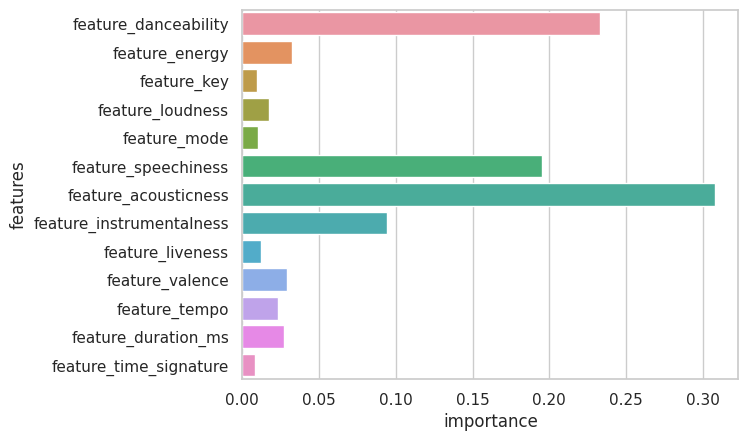

In [240]:
plt.style.use("default")
f = {'features' : features}
feature_importance = pd.DataFrame(f)
feature_importance['importance'] = search_dt.best_estimator_.feature_importances_
sns.set_theme(style="whitegrid")
ax = sns.barplot(x="importance", y="features", data=feature_importance)

### ROC
Source: https://scikit-learn.org/stable/modules/generated/sklearn.metrics.roc_curve.html

<Figure size 640x480 with 0 Axes>

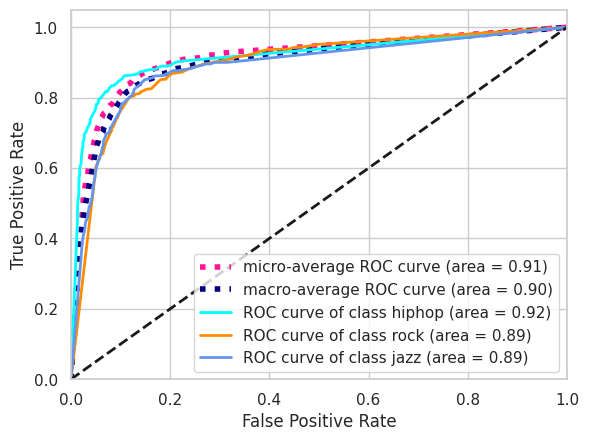

In [241]:
y = label_binarize(y_test, classes=[0, 1, 2])
n_classes = y.shape[1]

# create x_score 
y_test_new = []

for i in y_test:
    if i == 0:
        y_test_new.append([1, 0, 0])
    elif i == 1: 
        y_test_new.append([0, 1, 0])
    elif i == 2: 
        y_test_new.append([0, 0, 1])

# test input
y_test_np = np.asarray(y_test_new)

# score input
y_score = search_dt.predict_proba(X_test)

# Compute ROC curve and ROC area for each class
fpr = dict()
tpr = dict()
roc_auc = dict()

for i in range(n_classes):
    fpr[i], tpr[i], _ = roc_curve(y_test_np[:, i], y_score[:, i])
    roc_auc[i] = auc(fpr[i], tpr[i])

# Compute micro-average ROC curve and ROC area
fpr["micro"], tpr["micro"], _ = roc_curve(y_test_np.ravel(), y_score.ravel())
roc_auc["micro"] = auc(fpr["micro"], tpr["micro"])

plt.figure()

lw = 2
# First aggregate all false positive rates
all_fpr = np.unique(np.concatenate([fpr[i] for i in range(n_classes)]))

# Then interpolate all ROC curves at this points
mean_tpr = np.zeros_like(all_fpr)
for i in range(n_classes):
    mean_tpr += np.interp(all_fpr, fpr[i], tpr[i])

# Finally average it and compute AUC
mean_tpr /= n_classes

fpr["macro"] = all_fpr
tpr["macro"] = mean_tpr
roc_auc["macro"] = auc(fpr["macro"], tpr["macro"])

# Plot all ROC curves
plt.figure()
plt.plot(
    fpr["micro"],
    tpr["micro"],
    label="micro-average ROC curve (area = {0:0.2f})".format(roc_auc["micro"]),
    color="deeppink",
    linestyle=":",
    linewidth=4,
)

plt.plot(
    fpr["macro"],
    tpr["macro"],
    label="macro-average ROC curve (area = {0:0.2f})".format(roc_auc["macro"]),
    color="navy",
    linestyle=":",
    linewidth=4,
)

colors = cycle(["aqua", "darkorange", "cornflowerblue"])
for i, color in zip(range(n_classes), colors):
    if i == 0:
        cat = 'hiphop' 
    elif i == 1: 
        cat = 'rock'
    elif i == 2: 
        cat = 'jazz'

    plt.plot(
        fpr[i],
        tpr[i],
        color=color,
        lw=lw,
        label="ROC curve of class {0} (area = {1:0.2f})".format(cat, roc_auc[i]),
    )

plt.plot([0, 1], [0, 1], "k--", lw=lw)
plt.xlim([0.0, 1.0])
plt.ylim([0.0, 1.05])
plt.xlabel("False Positive Rate")
plt.ylabel("True Positive Rate")
plt.legend(loc="lower right")
plt.show()

## Evaluating the Gradient Boosting Model

### Classification Report

In [242]:
print(classification_report(y_test,search2.predict(X_test)))

              precision    recall  f1-score   support

           0       0.85      0.84      0.85       525
           1       0.89      0.89      0.89      1470
           2       0.79      0.80      0.80       681

    accuracy                           0.86      2676
   macro avg       0.84      0.84      0.84      2676
weighted avg       0.86      0.86      0.86      2676



### Confusion Matrix

In [243]:
df_confusion_gb = pd.crosstab(y_test, search.predict(X_test), rownames=['Actual'], colnames=['Predicted'], margins=True)
df_confusion_gb

Predicted,0,1,2,All
Actual,,,,
0,438,62,25,525
1,43,1310,117,1470
2,31,99,551,681
All,512,1471,693,2676


### Feature Importance

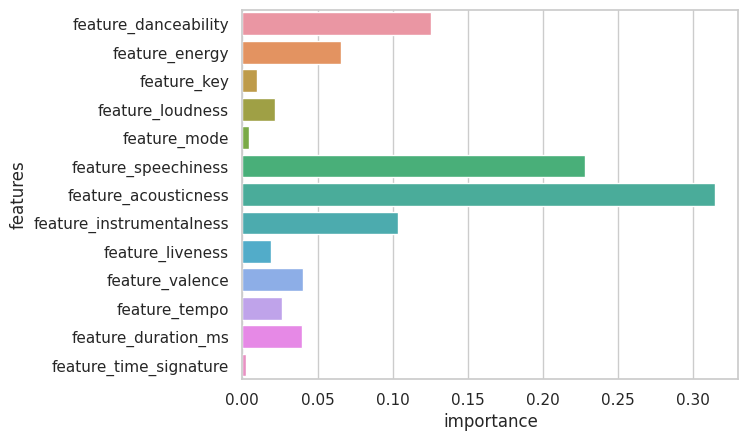

In [244]:
f = {'features' : features}
feature_importance = pd.DataFrame(f)
feature_importance['importance'] = search2.best_estimator_.feature_importances_

sns.set_theme(style="whitegrid")
ax = sns.barplot(x="importance", y="features", data=feature_importance)

### ROC

<Figure size 640x480 with 0 Axes>

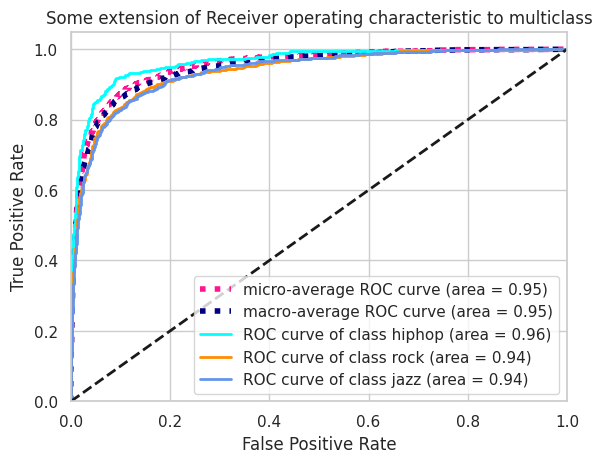

In [246]:
y = label_binarize(y_test, classes=[0, 1, 2])
n_classes = y.shape[1]

n_classes

# create x_score 
y_test_new = []

for i in y_test:
    if i == 0:
        y_test_new.append([1, 0, 0])
    elif i == 1: 
        y_test_new.append([0, 1, 0])
    elif i == 2: 
        y_test_new.append([0, 0, 1])

# test input
y_test_np = np.asarray(y_test_new)

# score input
y_score = search2.decision_function(X_test)


# Compute ROC curve and ROC area for each class
fpr = dict()
tpr = dict()
roc_auc = dict()

for i in range(n_classes):
    fpr[i], tpr[i], _ = roc_curve(y_test_np[:, i], y_score[:, i])
    roc_auc[i] = auc(fpr[i], tpr[i])

# Compute micro-average ROC curve and ROC area
fpr["micro"], tpr["micro"], _ = roc_curve(y_test_np.ravel(), y_score.ravel())
roc_auc["micro"] = auc(fpr["micro"], tpr["micro"])

plt.figure()
lw = 2
# First aggregate all false positive rates
all_fpr = np.unique(np.concatenate([fpr[i] for i in range(n_classes)]))

# Then interpolate all ROC curves at this points
mean_tpr = np.zeros_like(all_fpr)
for i in range(n_classes):
    mean_tpr += np.interp(all_fpr, fpr[i], tpr[i])

# Finally average it and compute AUC
mean_tpr /= n_classes

fpr["macro"] = all_fpr
tpr["macro"] = mean_tpr
roc_auc["macro"] = auc(fpr["macro"], tpr["macro"])

# Plot all ROC curves
plt.figure()
plt.plot(
    fpr["micro"],
    tpr["micro"],
    label="micro-average ROC curve (area = {0:0.2f})".format(roc_auc["micro"]),
    color="deeppink",
    linestyle=":",
    linewidth=4,
)

plt.plot(
    fpr["macro"],
    tpr["macro"],
    label="macro-average ROC curve (area = {0:0.2f})".format(roc_auc["macro"]),
    color="navy",
    linestyle=":",
    linewidth=4,
)

colors = cycle(["aqua", "darkorange", "cornflowerblue"])

for i, color in zip(range(n_classes), colors):
    if i == 0:
        cat = 'hiphop' 
    elif i == 1: 
        cat = 'rock'
    elif i == 2: 
        cat = 'jazz'

    plt.plot(
        fpr[i],
        tpr[i],
        color=color,
        lw=lw,
        label="ROC curve of class {0} (area = {1:0.2f})".format(cat, roc_auc[i]),
    )

plt.plot([0, 1], [0, 1], "k--", lw=lw)
plt.xlim([0.0, 1.0])
plt.ylim([0.0, 1.05])
plt.xlabel("False Positive Rate")
plt.ylabel("True Positive Rate")
plt.title("Some extension of Receiver operating characteristic to multiclass")
plt.legend(loc="lower right")
plt.show()
